In [14]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv(r"C:\Users\rishi\Desktop\SIH final\updated_crop_prices_dataset.csv",skipinitialspace=True, usecols=fields)

In [16]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [17]:
df=df.set_index('Price_Date')

In [18]:
df.head(2)

,Modal_Price
Price_Date,
2010-04-06,1723.354779
2010-04-13,1728.045744


In [19]:
data = df.copy()
y = data

In [20]:
y

,Modal_Price
Price_Date,
2010-04-06,1723.354779
2010-04-13,1728.045744
2010-04-20,1931.958863
2010-04-28,1847.457574
2010-05-05,1716.245143
...,...
2017-04-12,1859.074464
2017-04-19,1991.478343
2017-04-27,1928.107840


In [21]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Price_Date
2010-04-01    1807.704240
2010-05-01    1751.319717
2010-06-01    1684.716217
2010-07-01    1728.944471
2010-08-01    1826.792265
                 ...     
2017-01-01    1739.969871
2017-02-01    1778.802499
2017-03-01    1717.689225
2017-04-01    1893.919850
2017-05-01    1830.831756
Freq: MS, Name: Modal_Price, Length: 86, dtype: float64


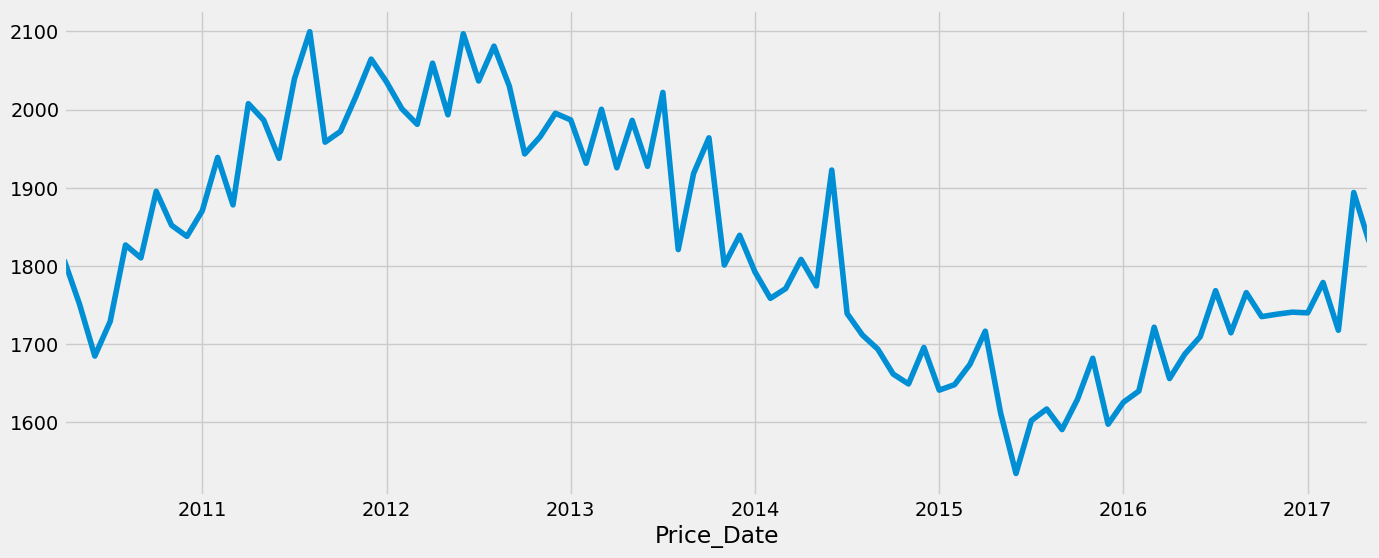

In [22]:
y.plot(figsize=(15, 6))
plt.show()

In [23]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1520.7569182512011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1224.4261972730014
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:941.3813396422784
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:778.8395611949654
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:956.1610614870319
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:940.9822078544489
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:791.5783165382642
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:780.8331523788447
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1393.7899099784588
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1122.2876004918278
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:903.501829029916
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:754.1663340895708
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:960.6714067988707
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:909.2816823484787
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:777.6331967119775
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:756.0557889229627
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:954.308955649774
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:813.3461839321694
ARIMA(0,

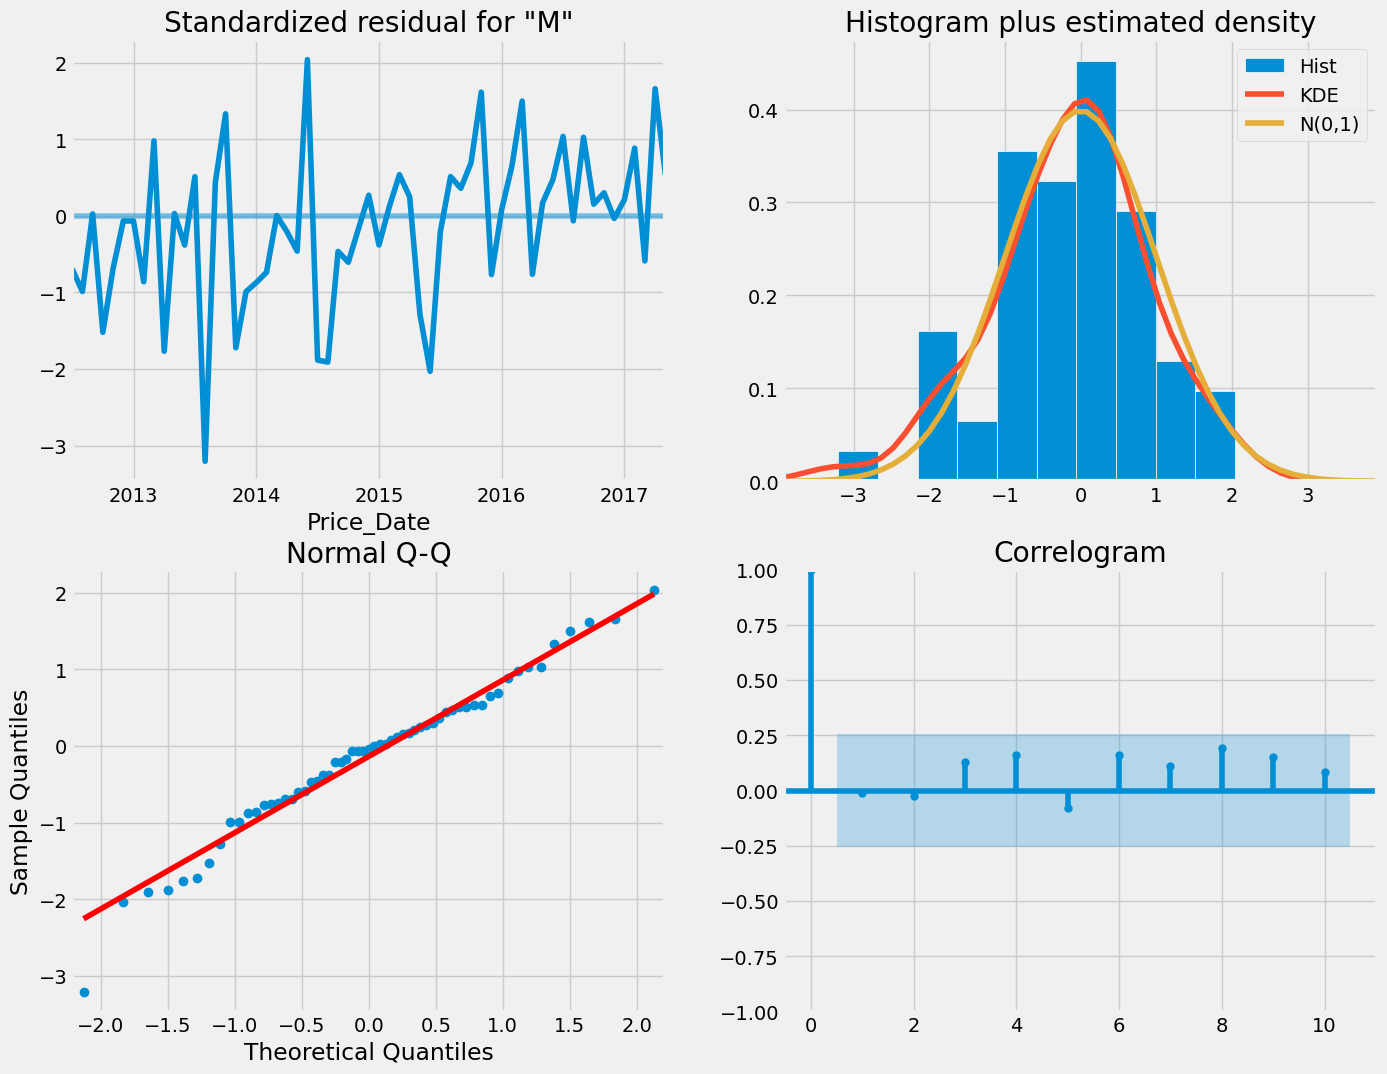

In [25]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [26]:
date_to_predict = input("enter date from which you want to  predict:")

In [27]:
pred = results.get_prediction(start=pd.to_datetime(date_to_predict), dynamic=False)
pred_ci = pred.conf_int()

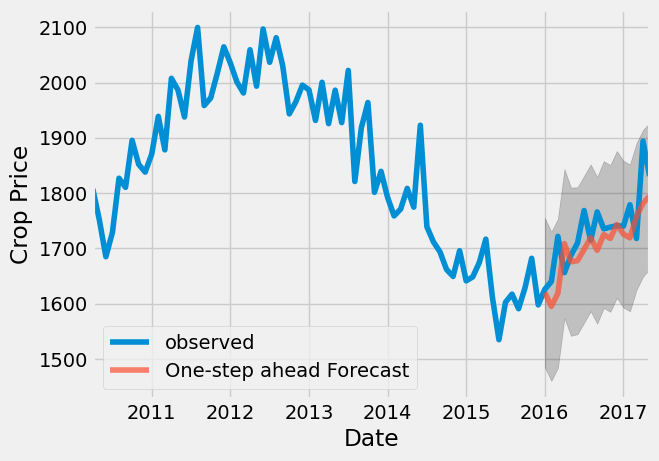

In [28]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2722.54


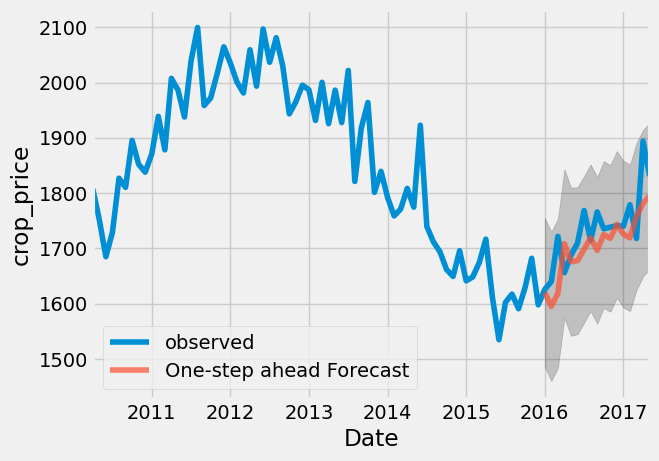

In [30]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2722.54


In [32]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(date_to_predict), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

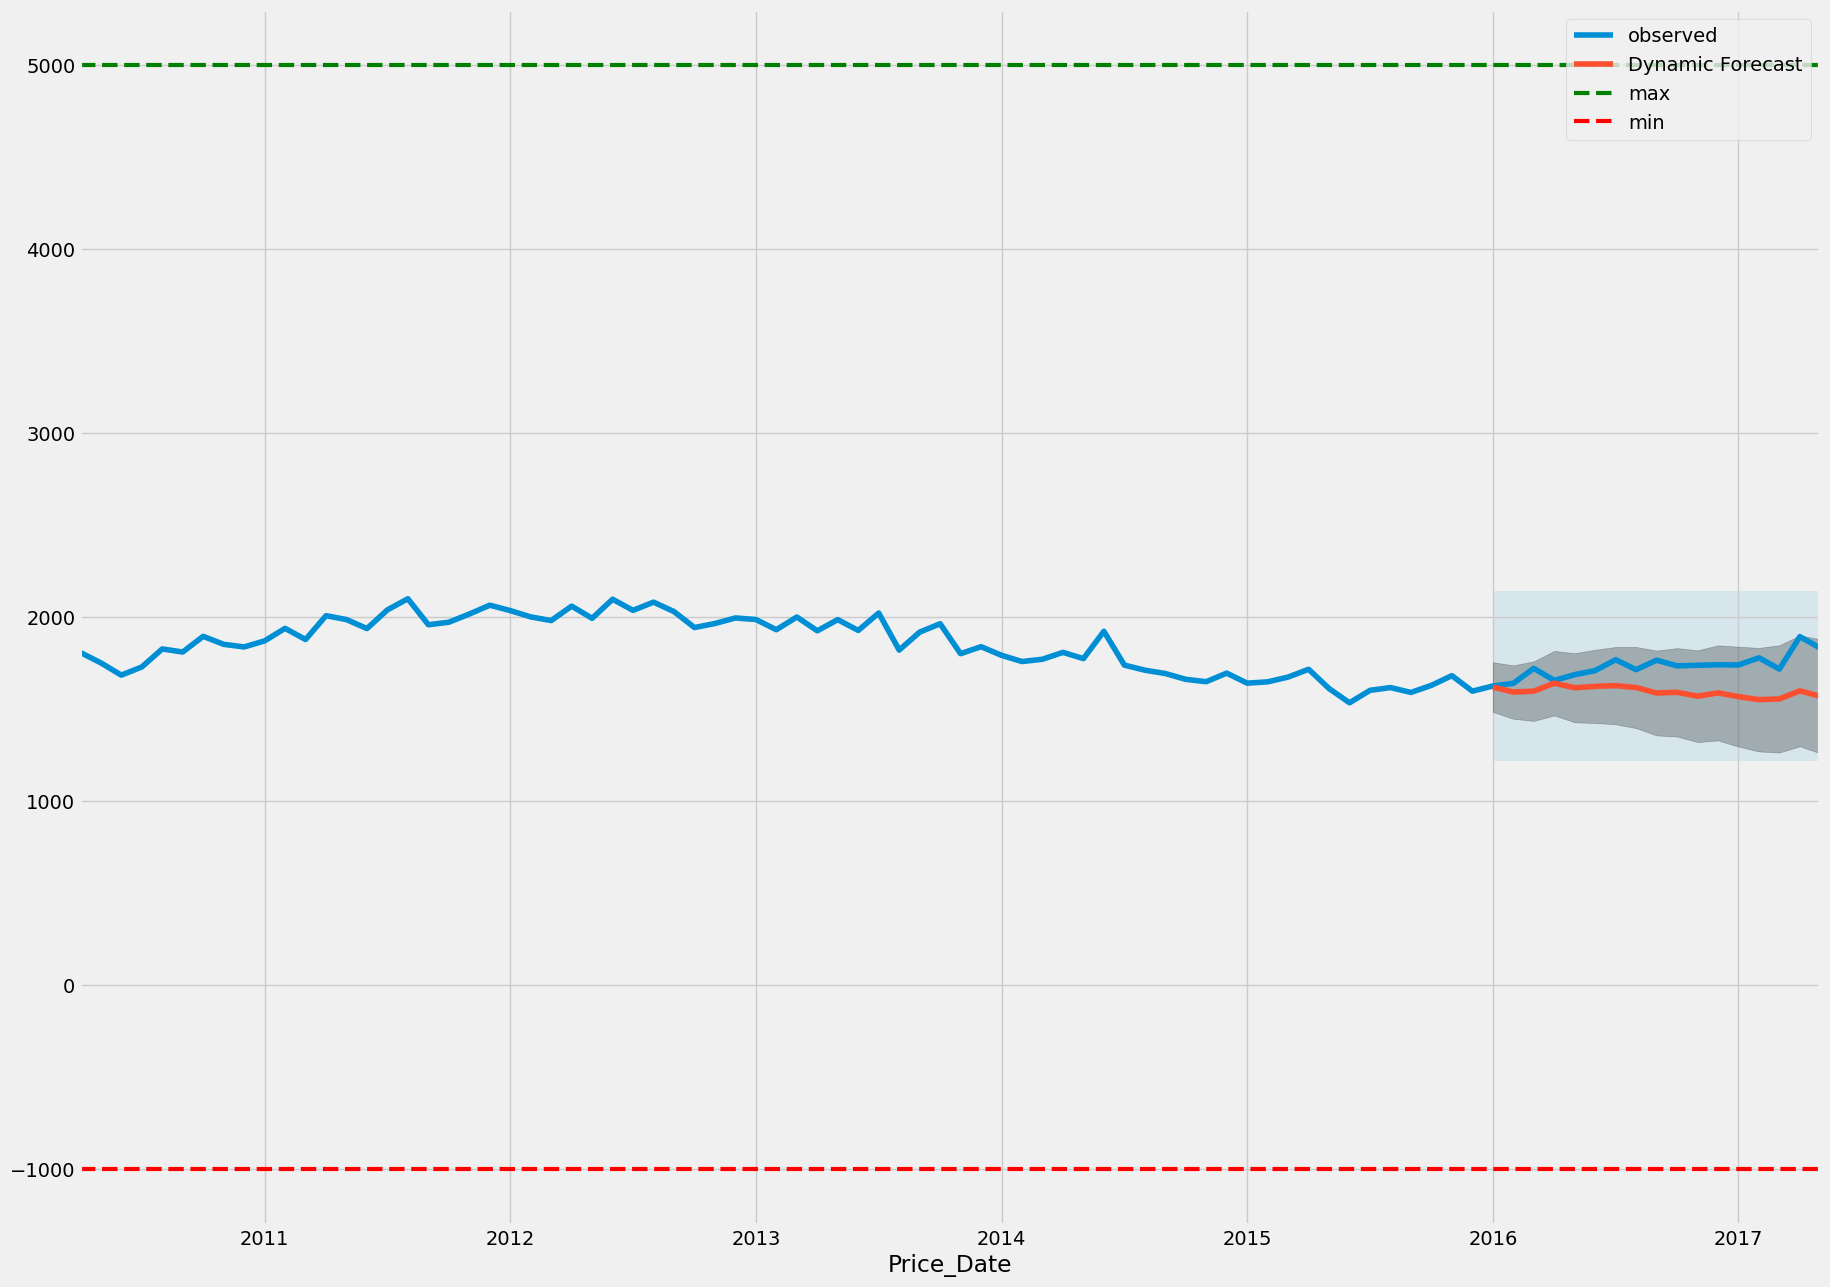

In [33]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(date_to_predict), y.index[-1],
                 alpha=.1, zorder=-1)

ax.hlines(y=5000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='green', linewidth=3, linestyles='--', label='max')
ax.hlines(y=-1000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='red', linewidth=3, linestyles='--', label='min')

plt.legend()
plt.show()

In [34]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25068.96


In [35]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [36]:
pred_ci

,lower Modal_Price,upper Modal_Price
2017-06-01,1698.270435,1961.012372
2017-07-01,1702.472567,1984.571107
2017-08-01,1673.690436,1988.313942
2017-09-01,1638.130491,1978.916254
2017-10-01,1628.866125,1994.633972
2017-11-01,1602.659620,1991.659959
2017-12-01,1602.251500,2013.205462
2018-01-01,1576.865982,2008.652921
2018-02-01,1561.519370,2013.186497
2018-03-01,1563.107766,2033.824237


In [37]:
# Get the lowest modal price from the lower Modal_Price column
lowest_modal_price = pred_ci['lower Modal_Price'].min()

# Get the highest modal price from the upper Modal_Price column
highest_modal_price = pred_ci['upper Modal_Price'].max()

# Print the results
print(f"Lowest Modal Price: {lowest_modal_price:.2f}")
print(f"Highest Modal Price: {highest_modal_price:.2f}")

Lowest Modal Price: 1460.78
Highest Modal Price: 2113.52


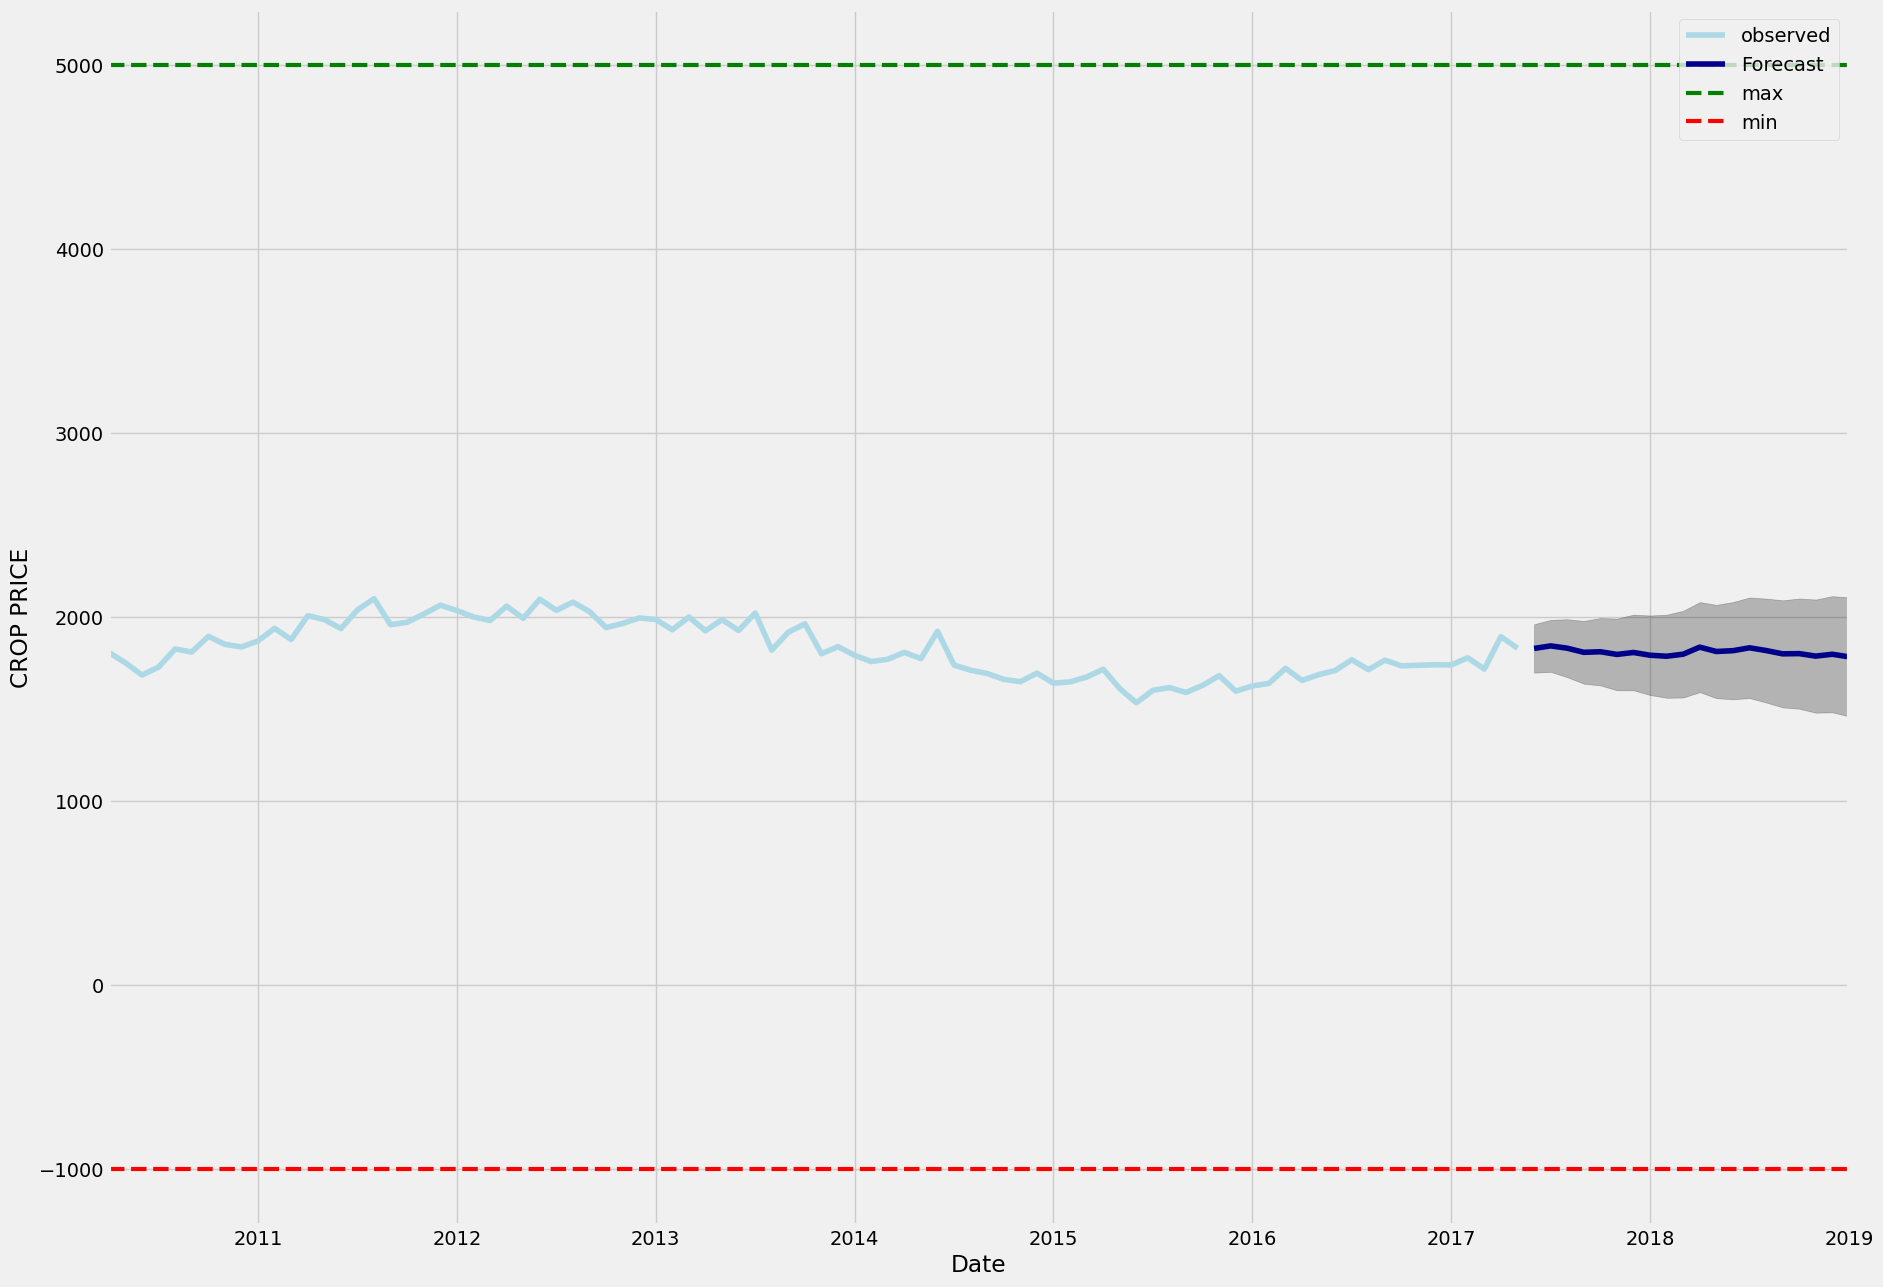

In [38]:
import matplotlib.pyplot as plt

# Your existing plot code
ax = y.plot(label='observed', figsize=(20, 15), color='lightblue')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='darkblue')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

# Add bold horizontal lines with labels
ax.hlines(y=5000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='green', linewidth=3, linestyles='--', label='max')
ax.hlines(y=-1000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='red', linewidth=3, linestyles='--', label='min')

plt.legend()
plt.show()